In [ ]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [ ]:
from keras.models import load_model

In [ ]:
!pip install segmentation-models

     |████████████████████████████████| 50 kB 6.5 MB/s 


In [ ]:
import segmentation_models as sm

Segmentation Models: using `keras` framework.


In [ ]:
model = load_model('/content/drive/MyDrive/Project BGKT/Flek/h5/flek_ResUnet.h5', custom_objects={'binary_crossentropy_plus_jaccard_loss':sm.losses.bce_jaccard_loss, 'iou_score':sm.metrics.iou_score}, compile=False)

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   9           ['data[0][0]']                   
                                3)                                                                
                                                                                                  
 zero_padding2d_1 (ZeroPadding2  (None, None, None,   0          ['bn_data[0][0]']                
 D)                             3)                                                          

In [ ]:
from PIL import Image
import matplotlib.image as img
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Original Mask')

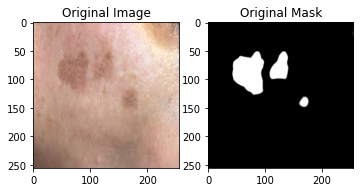

In [ ]:
imge = '/content/tes.tif'
imagearray = img.imread(imge)
imagearray1 = imagearray/255.



test_img_input=np.expand_dims(imagearray1, 0)

prediction = model.predict(test_img_input)
prediction = prediction[0,:,:,0]

plt.figure(figsize=(12,12))
plt.subplot(1,4,1)
plt.imshow(np.squeeze(imagearray))
plt.title('Original Image')
plt.subplot(1,4,2)
plt.imshow(prediction, cmap='gray')
plt.title('Original Mask')

In [ ]:
keras_model = tf.keras.models.load_model('/content/drive/MyDrive/Project BGKT/Flek/h5/flek_ResUnet.h5', custom_objects={'binary_crossentropy_plus_jaccard_loss':sm.losses.bce_jaccard_loss, 'iou_score':sm.metrics.iou_score}, compile=False)
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)

In [ ]:
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpfw7_vywt/assets


In [ ]:
#gangerti
#WARNING:absl:Buffer deduplication procedure will be skipped when flatbuffer library is not properly loaded

In [ ]:
import pathlib

In [ ]:
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

97783624